In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
df = pd.read_csv("/content/creditcard.csv")
print(df.shape)
print()
df.head()

(284807, 31)



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
print('Fraud Transactions: {}'.format(len(df[df['Class'] == 1])))
print('Normal Transactions: {}'.format(len(df[df['Class'] == 0])))

Fraud Transactions: 492
Normal Transactions: 284315


In [ ]:
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]
print('Amount details of the fraudulent transaction')
fraud.Amount.describe()

Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
print('Amount details of the non_fraud transaction')
non_fraud.Amount.describe()

Amount details of the non_fraud transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
#x will contain all columns of data except `class`
x = df.drop('Class',axis=1) 
y = df['Class']
print(x.shape,y.shape)

(284807, 30) (284807,)


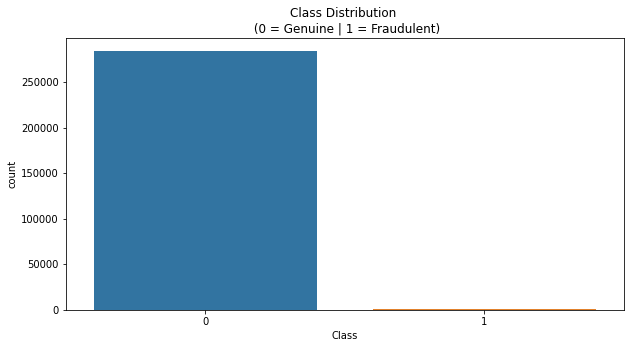

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Class', data = df)
plt.title('Class Distribution \n (0 = Genuine | 1 = Fraudulent)');

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((227845, 30), (56962, 30), (227845,), (56962,))

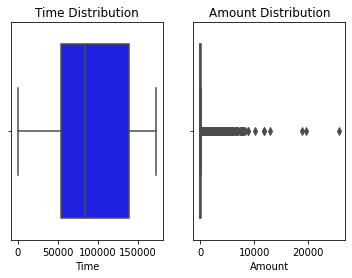

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2)

#Time
sns.boxplot(ax=ax1, data=x_train, x='Time', color='b')
ax1.set_title('Time Distribution')
# Amount
sns.boxplot(ax=ax2, data=x_train, x='Amount', color='r')
ax2.set_title('Amount Distribution');

In [ ]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
X_train = robust_scaler.fit_transform(x_train)
X_test = robust_scaler.transform(x_test)

In [ ]:
print(X_train)

[[ 6.88774312e-01  8.66514037e-01 -3.18740903e-01 ...  2.69826619e-01
  -4.45139004e-01 -1.67972028e-01]
 [ 3.81306962e-01 -1.87412161e-01 -4.94335107e-01 ... -2.29014575e+00
  -1.18801493e+00  3.34265734e-01]
 [ 7.61744809e-01  2.43934573e-02  5.38221071e-01 ...  1.26284605e+00
   4.48261891e-01 -1.40000000e-01]
 ...
 [-5.76905008e-02 -7.36254539e-02  6.61185829e-01 ... -7.54486386e-01
  -1.57908244e+00 -2.52587413e-01]
 [ 3.78652636e-02 -1.32706845e+00  1.63267692e+00 ...  3.05218623e+00
   2.46838464e+00 -2.93706294e-01]
 [-9.77872780e-02  5.43598556e-01 -6.06975975e-01 ... -8.78479616e-04
   2.07096240e-01  1.27272727e+00]]


In [ ]:
clf = RandomForestClassifier(class_weight = 'balanced_subsample', criterion = 'entropy', max_features = 'log2', n_estimators = 4)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)
print(f"Accuracy Score of Random Forest : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest : 0.999385555282469
Confusion Matrix : 
[[56863     1]
 [   34    64]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.98      0.65      0.79        98

    accuracy                           1.00     56962
   macro avg       0.99      0.83      0.89     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
clf = LogisticRegression(C = 10, penalty = 'l2', solver = 'lbfgs')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)
print(f"Accuracy Score of Logistic Regression : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression : 0.9991222218320986
Confusion Matrix : 
[[56855     9]
 [   41    57]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
clf = KNeighborsClassifier(n_neighbors = 1, weights = 'uniform')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)
print(f"Accuracy Score of K-Nearest Neighbors : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of K-Nearest Neighbors : 0.9995084442259752
Confusion Matrix : 
[[56853    11]
 [   17    81]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.83      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
smote = SMOTE(random_state=42)
X_train_re,Y_train_re  = smote.fit_resample(X_train, y_train)

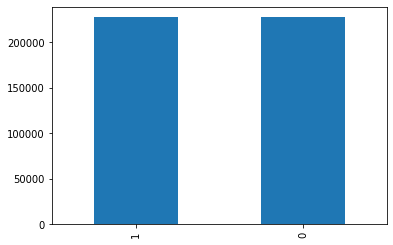

In [ ]:
X = pd.DataFrame(X_train_re)
Y = pd.DataFrame(Y_train_re)
Y.iloc[:,-1].value_counts().plot.bar()

In [ ]:
X.shape,Y.shape

((454902, 30), (454902, 1))

In [ ]:
k_range = list(range(1, 21))
weight_options = ['uniform', 'distance']
param_grid_KNN = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid_KNN)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'weights': ['uniform', 'distance'], 'metric': ['manhattan', 'minkowski']}


In [ ]:
knn = KNeighborsClassifier()
grid_KNN = GridSearchCV(knn, param_grid_KNN, cv=10, scoring='accuracy')
grid_KNN.fit(X, Y)

In [ ]:
rKNN=pd.DataFrame(grid_KNN.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
rKNN.to_csv('Result_KNN.csv', index=True)

In [ ]:
print(grid_KNN.best_score_)
print(grid_KNN.best_params_)

0.9805474578084794
{'n_neighbors': 1, 'weights': 'uniform'}


In [ ]:
class_weight= ['balanced','balanced_supsample']
criterion = ['entropy', 'gini']
max_features = ['auto','sqrt','log2']
n_estimators =  list(range(1, 5))

param_grid_RF = dict(class_weight=class_weight,criterion=criterion,max_features=max_features,n_estimators=n_estimators)
print(param_grid_RF)


{'criterion': ['entropy', 'gini'], 'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'n_estimators': [10, 100, 1000]}


In [ ]:
rdf = RandomForestClassifier()
grid_RF = GridSearchCV(rdf, param_grid_RF, cv=10, scoring='accuracy')
grid_RF.fit(X, Y)

In [ ]:
pd.DataFrame(grid_RF.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.997549,0.000222,"{'class_weight': 'balanced', 'criterion': 'ent..."
1,0.998496,0.000188,"{'class_weight': 'balanced', 'criterion': 'ent..."
2,0.999624,0.000100,"{'class_weight': 'balanced', 'criterion': 'ent..."
3,0.999752,0.000072,"{'class_weight': 'balanced', 'criterion': 'ent..."
4,0.997837,0.000252,"{'class_weight': 'balanced', 'criterion': 'ent..."
5,0.998371,0.000220,"{'class_weight': 'balanced', 'criterion': 'ent..."
6,0.999589,0.000095,"{'class_weight': 'balanced', 'criterion': 'ent..."
7,0.999727,0.000074,"{'class_weight': 'balanced', 'criterion': 'ent..."
8,0.997665,0.000325,"{'class_weight': 'balanced', 'criterion': 'ent..."
9,0.998312,0.000303,"{'class_weight': 'balanced', 'criterion': 'ent..."


In [ ]:
print(grid_RF.best_score_)
print(grid_RF.best_params_)

0.9997691812476572
{'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 4}


In [ ]:
rRF=pd.DataFrame(grid_RF.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
rRF.to_csv('Result_RandomForest.csv', index=True)

In [ ]:
lr = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'sag','saga']
penalty = ['none', 'l1', 'l2', 'elasticnet']
C = [100, 10, 1.0, 0.1, 0.01]
para_lr = dict(C=C,solver=solvers,penalty=penalty)
print(para_lr)

{'C': [100, 10, 1.0, 0.1, 0.01], 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 'penalty': ['none', 'l1', 'l2', 'elasticnet']}


In [ ]:
grid_LR = GridSearchCV(lr, para_lr, cv=10,scoring='accuracy')
grid_LR.fit(X, Y)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
rLR=pd.DataFrame(grid_LR.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
rLR.to_csv('Result_LogisticRegression.csv', index=True)

In [ ]:
print(grid_LR.best_score_)
print(grid_LR.best_params_)

0.9485119891551967
{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:
clf = LogisticRegression(C = 10, penalty = 'l2', solver = 'lbfgs')
clf.fit(X,Y)
y_pred = clf.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)
print(f"Accuracy Score of Logistic Regression : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression : 0.9745970998209332
Confusion Matrix : 
[[55425  1439]
 [    8    90]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



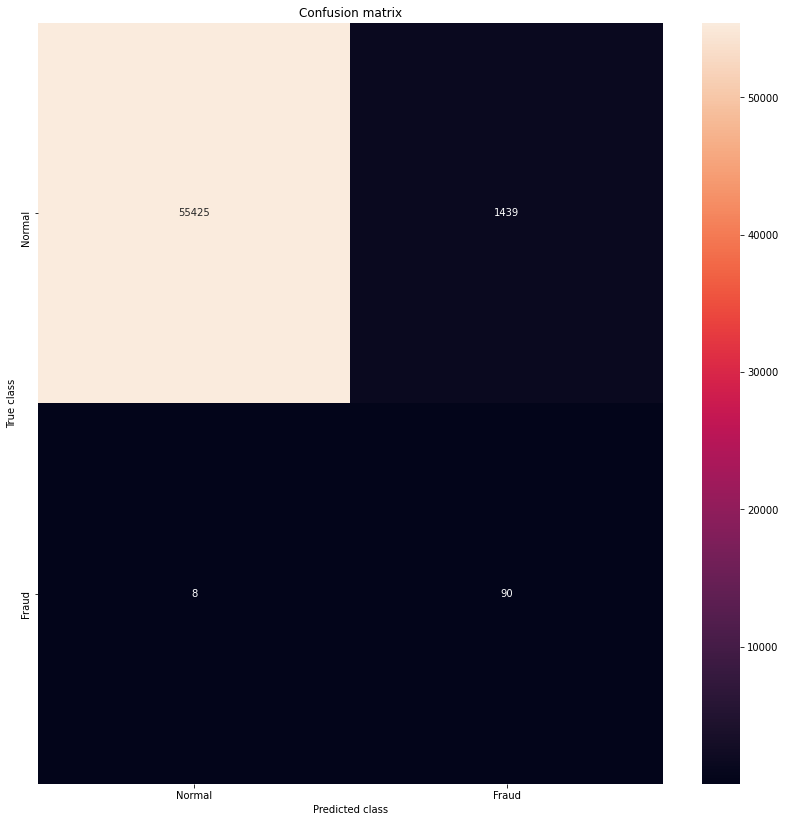

In [ ]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize =(14, 14))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
clf = RandomForestClassifier(class_weight = 'balanced_subsample', criterion = 'entropy', max_features = 'log2', n_estimators = 4)
clf.fit(X,Y)
y_pred = clf.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)
print(f"Accuracy Score of Random Forest : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest : 0.9994557775359011
Confusion Matrix : 
[[56854    10]
 [   21    77]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.89      0.79      0.83        98

    accuracy                           1.00     56962
   macro avg       0.94      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962



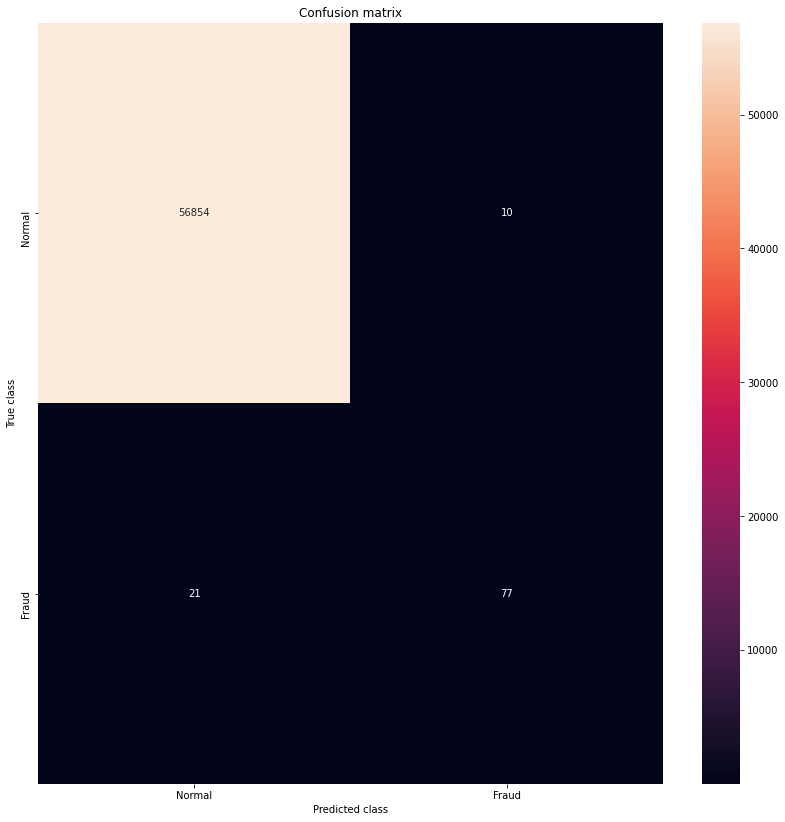

In [ ]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize =(14, 14))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
clf = KNeighborsClassifier(n_neighbors = 1, weights = 'uniform')
clf.fit(X,Y)
y_pred = clf.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)
print(f"Accuracy Score of K-Nearest Neighbors : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of K-Nearest Neighbors : 0.9988588883817282
Confusion Matrix : 
[[56813    51]
 [   14    84]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.62      0.86      0.72        98

    accuracy                           1.00     56962
   macro avg       0.81      0.93      0.86     56962
weighted avg       1.00      1.00      1.00     56962



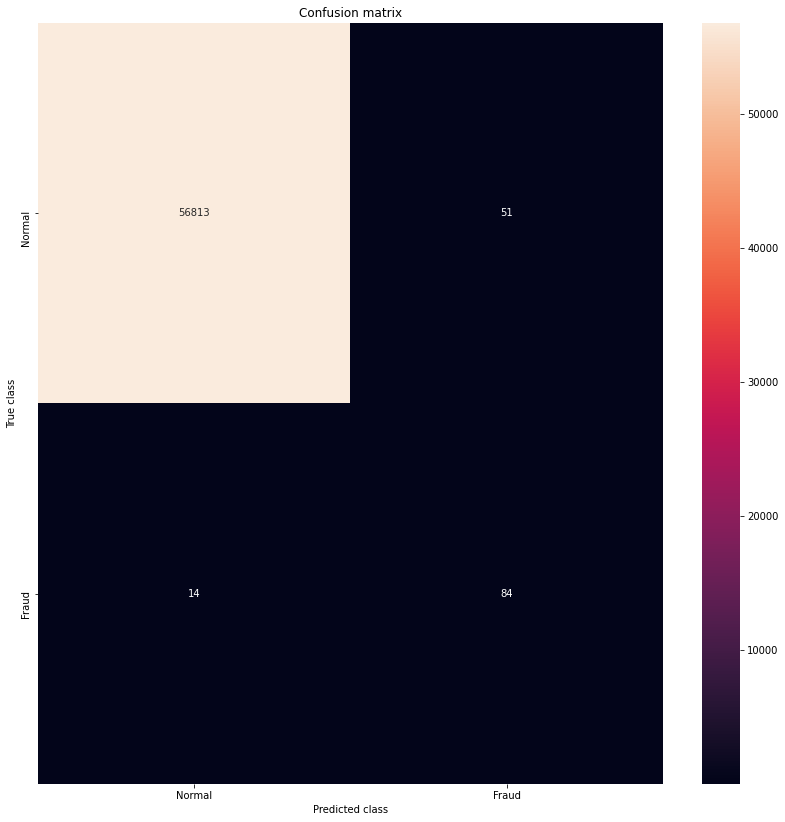

In [ ]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize =(14, 14))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth. credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#https://drive.google.com/file/d/1IOVUETAvBVg7rDb4Vvgi0Gc0kr8Hj6C0/view?usp=sharing
fileDownloaded_data = drive.CreateFile({'id': '1IOVUETAvBVg7rDb4Vvgi0Gc0kr8Hj6C0'})

In [ ]:
fileDownloaded_data.GetContentFile('creditcard.csv')

In [ ]:
df = pd.read_csv('creditcard.csv')

In [ ]:
x = df.drop('Class', axis=1) 
y = df['Class']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [ ]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
X_train = robust_scaler.fit_transform(x_train)
X_test = robust_scaler.transform(x_test)

In [ ]:
smote = SMOTE(random_state=42)
X_train_re,Y_train_re  = smote.fit_resample(X_train, y_train)
X = pd.DataFrame(X_train_re)
Y = pd.DataFrame(Y_train_re)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(class_weight = 'balanced_subsample', criterion = 'entropy', max_features = 'log2', n_estimators = 4)
clf.fit(X,Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=None, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=4, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [ ]:
import pickle
filename = 'RandomForest_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:
filename = 'RandomForest_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))
y_pred = loaded_model.predict(X_test)

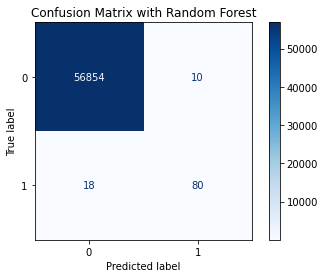

Recall:  0.8163265306122449
Precision:  0.8888888888888888
F1 Score:  0.851063829787234


In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
plot_confusion_matrix(loaded_model, X_test, y_test, cmap = plt.cm.Blues, values_format = '.0f')
plt.title('Confusion Matrix with Random Forest')
plt.show()

print('Recall: ', recall_score(y_test,y_pred))
print('Precision: ', precision_score(y_test,y_pred))
print('F1 Score: ', f1_score(y_test,y_pred))

In [ ]:
df2 = pd.DataFrame(list(range(1,56962)))

X_Test=pd.DataFrame(X_test)
X_Test['Number'] = list(range(1,56963))
x_Test=pd.DataFrame(x_test)
x_Test['Number'] = list(range(1,56963))


y_Test=pd.DataFrame(y_test)
y_Test['Number'] = list(range(1,56963))
print(x_Test)

            Time         V1        V2  ...       V28  Amount  Number
43428    41505.0 -16.526507  8.584972  ... -1.042804  364.19       1
49906    44261.0   0.339812 -2.743745  ...  0.102038  520.12       2
29474    35484.0   1.399590 -0.590701  ...  0.004634   31.00       3
276481  167123.0  -0.432071  1.647895  ...  0.001934    1.50       4
278846  168473.0   2.014160 -0.137394  ... -0.070571    0.89       5
...          ...        ...       ...  ...       ...     ...     ...
75723    56223.0  -1.994348  1.503076  ... -0.015071   75.69   56958
252263  155726.0  -0.234567  0.733694  ...  0.163736    9.99   56959
221246  142491.0   0.040441 -0.109737  ...  0.354379    7.63   56960
81910    59157.0  -0.495048  0.991481  ... -0.269775    3.59   56961
59490    48864.0  -1.590486  0.992415  ... -0.607226  906.31   56962

[56962 rows x 31 columns]


In [ ]:
#demo dự đoán 1 datapoint
import random
import array as arr

#lấy điểm dữ liệu ngẫu nhiên trong tập test
index = random.randrange(1, 56962,1)
X_ree = X_Test.iloc[index, 0:30].values.reshape(1, -1)
Y_ree = y_Test.iloc[index].values
Y_pred = loaded_model.predict(X_ree)

print('So thu tu: ',index)
print('Datapoint: ',x_Test.iloc[index, 0:30].values.reshape(1, -1))
print('Lớp thực tế của điểm dữ liệu: ', Y_ree[0])
print('Lớp được mô hình dự đoán của diểm dữ liệu: ', Y_pred)

So thu tu:  36706
Datapoint:  [[ 1.54498000e+05  8.83047070e-01 -3.14408095e+00 -1.30506142e+00
  -7.55089013e-01 -1.89075315e+00 -6.33417007e-01  5.28673467e-02
  -3.09468386e-01  5.08117736e-01  7.67267683e-03 -1.07821905e+00
   2.74699664e-01  9.36013924e-02 -5.55131894e-02  1.46231127e-01
  -1.67034957e+00  2.14571022e-01  6.15486019e-01 -3.09176937e-01
   7.12531378e-01 -3.98585001e-01 -1.96636495e+00 -2.31446076e-02
  -1.02548846e-01 -9.83875051e-01  1.38616737e-01 -1.41637432e-01
   6.66827291e-02  6.62640000e+02]]
Lớp thực tế của điểm dữ liệu:  0
Lớp được mô hình dự đoán của diểm dữ liệu:  [0]
